# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [6]:
!pip install wbdata #instalo las librerías 
!pip install pandas

ERROR: Invalid requirement: '#instalo': Expected package name at the start of dependency specifier
    #instalo
    ^


In [7]:
import wbdata
import pandas as pd
import datetime

In [8]:
help(wbdata)

Help on package wbdata:

NAME
    wbdata - wbdata: A wrapper for the World Bank API

PACKAGE CONTENTS
    cache
    client
    dates
    fetcher

FUNCTIONS
    get_default_client() -> wbdata.client.Client
        Get the default client

VERSION
    1.0.0

FILE
    c:\users\gustavo\anaconda3\lib\site-packages\wbdata\__init__.py




In [9]:
indicadores = {'NY.GDP.PCAP.CD': 'PIB per cápita (USD corrientes)','SP.DYN.LE00.IN':'Esperanza de vida al nacer (años)'} #elijo indicadores


data = wbdata.get_dataframe(indicadores, country=['BRA','ARG'])

df = pd.DataFrame(data)



In [10]:
df_reset = df.reset_index()

In [11]:
df_reset["date"] = df_reset["date"].astype(int)      #hago esto ya que no me muestra las primeras 10 filas de brasil así que lo configuro por años
df_brasil = df_reset[(df_reset["country"] == "Brazil") & 
                      (df_reset["date"] >= 2014) & 
                      (df_reset["date"] <= 2023)]

In [12]:

print(df.head(10))  # Muestra las primeras 10 filas de argentina
print(df_brasil)

                PIB per cápita (USD corrientes)  \
country   date                                    
Argentina 2023                     14187.482725   
          2022                     13935.681111   
          2021                     10738.017922   
          2020                      8535.599380   
          2019                      9955.974787   
          2018                     11752.799892   
          2017                     14532.500931   
          2016                     12699.962314   
          2015                     13679.626498   
          2014                     12233.144412   

                Esperanza de vida al nacer (años)  
country   date                                     
Argentina 2023                                NaN  
          2022                             76.064  
          2021                             75.390  
          2020                             75.892  
          2019                             77.284  
          2018         

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [34]:
print(data.head())  # Ver las primeras filas del DataFrame
print(data.index)   # Ver si los años están en el índice o en una columna

                PIB per cápita (USD corrientes)  \
country   date                                    
Argentina 2023                     14187.482725   
          2022                     13935.681111   
          2021                     10738.017922   
          2020                      8535.599380   
          2019                      9955.974787   

                Esperanza de vida al nacer (años)  
country   date                                     
Argentina 2023                                NaN  
          2022                             76.064  
          2021                             75.390  
          2020                             75.892  
          2019                             77.284  
MultiIndex([('Argentina', '2023'),
            ('Argentina', '2022'),
            ('Argentina', '2021'),
            ('Argentina', '2020'),
            ('Argentina', '2019'),
            ('Argentina', '2018'),
            ('Argentina', '2017'),
            ('Argentina', '2016')

In [52]:
data_filtered = data.loc[
# Filtrar solo los datos de Argentina y Brasil
    data.index.get_level_values("country").isin(["Argentina", "Brazil"]) & 
 # Convertir el índice de fecha a entero y filtrar entre 2014 y 2023
    (data.index.get_level_values("date").astype(int) >= 2014) &
    (data.index.get_level_values("date").astype(int) <= 2023)
]
# Imprimir los datos filtrados para verificar el resultado
print(data_filtered)

                PIB per cápita (USD corrientes)  \
country   date                                    
Argentina 2023                     14187.482725   
          2022                     13935.681111   
          2021                     10738.017922   
          2020                      8535.599380   
          2019                      9955.974787   
          2018                     11752.799892   
          2017                     14532.500931   
          2016                     12699.962314   
          2015                     13679.626498   
          2014                     12233.144412   
Brazil    2023                     10294.866681   
          2022                      9281.333344   
          2021                      7972.536650   
          2020                      7074.193783   
          2019                      9029.833267   
          2018                      9300.661649   
          2017                     10080.509282   
          2016                 

In [56]:
# Agrupar por país y calcular estadísticas descriptivas
stats = data_filtered.groupby("country").agg(
    {
        "PIB per cápita (USD corrientes)": ["mean", "median", "std", "min", "max"],
        "Esperanza de vida al nacer (años)": ["mean", "median", "std", "min", "max"]
    }
)

In [58]:
# Calcular el coeficiente de variación (std / mean * 100)
stats["PIB per cápita (USD corrientes)", "Coeficiente de variación (%)"] = \
    (stats["PIB per cápita (USD corrientes)"]["std"] / stats["PIB per cápita (USD corrientes)"]["mean"]) * 100

stats["Esperanza de vida al nacer (años)", "Coeficiente de variación (%)"] = \
    (stats["Esperanza de vida al nacer (años)"]["std"] / stats["Esperanza de vida al nacer (años)"]["mean"]) * 100

In [60]:
# Mostrar las estadísticas descriptivas
print(stats)

          PIB per cápita (USD corrientes)                             \
                                     mean        median          std   
country                                                                
Argentina                    12225.078997  12466.553363  1989.923605   
Brazil                        9308.141177   9155.583306  1397.854510   

                                     Esperanza de vida al nacer (años)  \
                   min           max                              mean   
country                                                                  
Argentina  8535.599380  14532.500931                         76.476111   
Brazil     7074.193783  12274.993969                         74.282000   

                                           PIB per cápita (USD corrientes)  \
           median       std    min     max    Coeficiente de variación (%)   
country                                                                      
Argentina  76.755  0.605264  75.39

#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

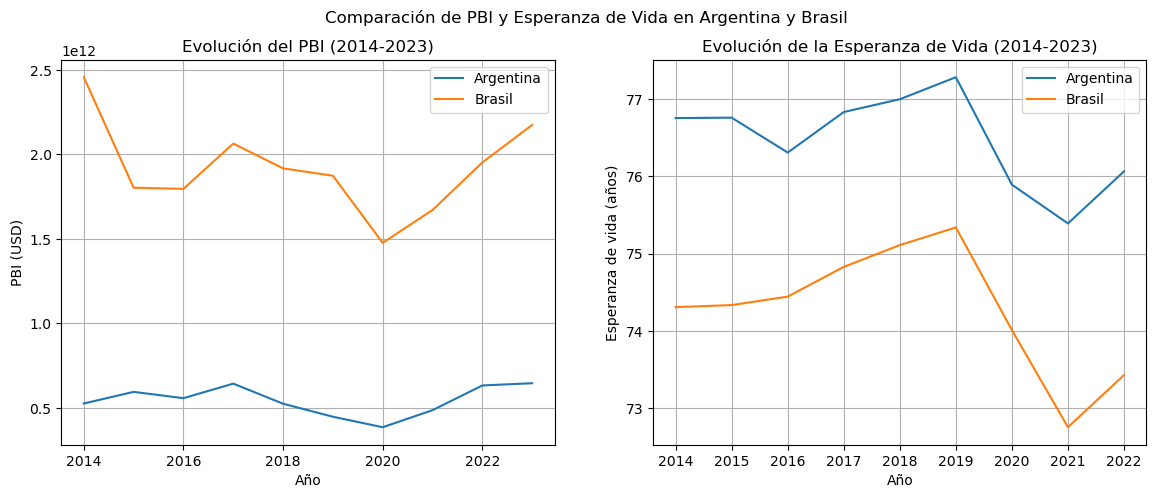

In [5]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Definir países y series de datos
countries = ["ARG", "BRA"]
indicators = {"NY.GDP.MKTP.CD": "GDP", "SP.DYN.LE00.IN": "Life Expectancy"}  # PIB en dólares corrientes y Esperanza de vida

# Definir el rango de años
start_year, end_year = "2014", "2023"

# Obtener datos de World Bank Data
df = wbdata.get_dataframe(indicators, country=countries, date=(start_year, end_year))

# Resetear índice y transformar datos
df = df.reset_index()
df["date"] = df["date"].astype(int)
df = df[(df["date"] >= 2014) & (df["date"] <= 2023)]
df = df.rename(columns={"date": "Año", "country": "Country Name"})

# Pivotear el DataFrame para tener países como columnas
df_pbi = df.pivot(index="Año", columns="Country Name", values="GDP").reset_index()
df_life = df.pivot(index="Año", columns="Country Name", values="Life Expectancy").reset_index()

# Definir ejes para PBI
x1 = df_pbi["Año"]
y1 = df_pbi["Argentina"]

x2 = df_pbi["Año"]
y2 = df_pbi["Brazil"]

# Definir ejes para Esperanza de vida
x3 = df_life["Año"]
y3 = df_life["Argentina"]

x4 = df_life["Año"]
y4 = df_life["Brazil"]

# Graficar múltiples gráficos estilo pyplot
plt.figure(figsize=(14, 5))

# Gráfico del PBI
plt.subplot(121)
plt.plot(x1, y1, label="Argentina")
plt.plot(x2, y2, label="Brasil")
plt.xlabel("Año")
plt.ylabel("PBI (USD)")
plt.title("Evolución del PBI (2014-2023)")
plt.legend()
plt.grid()

# Gráfico de Esperanza de vida
plt.subplot(122)
plt.plot(x3, y3, label="Argentina")
plt.plot(x4, y4, label="Brasil")
plt.xlabel("Año")
plt.ylabel("Esperanza de vida (años)")
plt.title("Evolución de la Esperanza de Vida (2014-2023)")
plt.legend()
plt.grid()

# Título general
plt.suptitle("Comparación de PBI y Esperanza de Vida en Argentina y Brasil")
plt.show(block=True)

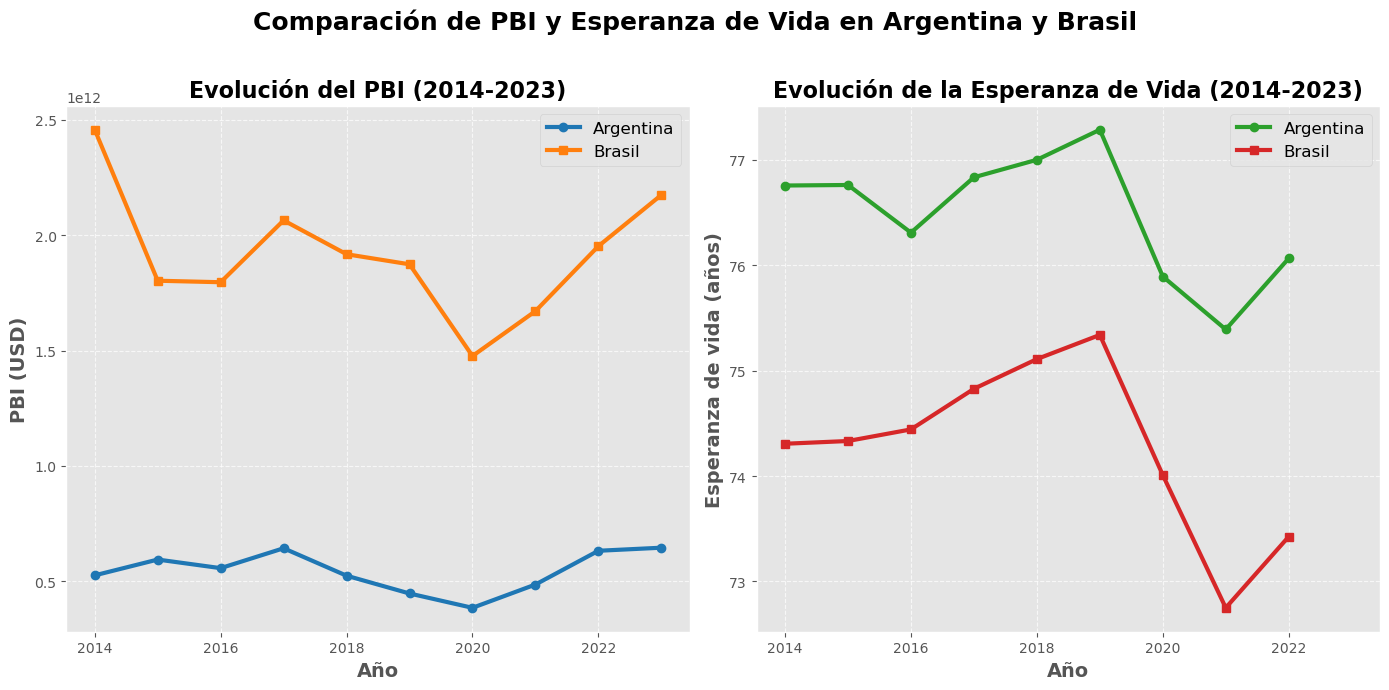

In [13]:
# Usamos el estilo ggplot
plt.style.use('ggplot')

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

# Gráfico del PBI con líneas elegantes
ax[0].plot(df_pbi["Año"], df_pbi["Argentina"], label="Argentina", color="#1f77b4", linewidth=3, linestyle='-', marker='o', markersize=6)
ax[0].plot(df_pbi["Año"], df_pbi["Brazil"], label="Brasil", color="#ff7f0e", linewidth=3, linestyle='-', marker='s', markersize=6)
ax[0].set_xlabel("Año", fontsize=14, fontweight='bold')
ax[0].set_ylabel("PBI (USD)", fontsize=14, fontweight='bold')
ax[0].set_title("Evolución del PBI (2014-2023)", fontsize=16, fontweight='bold')
ax[0].legend(fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de Esperanza de vida con líneas elegantes
ax[1].plot(df_life["Año"], df_life["Argentina"], label="Argentina", color="#2ca02c", linewidth=3, linestyle='-', marker='o', markersize=6)
ax[1].plot(df_life["Año"], df_life["Brazil"], label="Brasil", color="#d62728", linewidth=3, linestyle='-', marker='s', markersize=6)
ax[1].set_xlabel("Año", fontsize=14, fontweight='bold')
ax[1].set_ylabel("Esperanza de vida (años)", fontsize=14, fontweight='bold')
ax[1].set_title("Evolución de la Esperanza de Vida (2014-2023)", fontsize=16, fontweight='bold')
ax[1].legend(fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)

# Título general con un tamaño de fuente más grande
fig.suptitle("Comparación de PBI y Esperanza de Vida en Argentina y Brasil", fontsize=18, fontweight='bold')

# Ajustar el espaciado entre los gráficos
fig.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from datetime import datetime

# Configurar las opciones de Chrome
chrome_options = Options()
chrome_options.add_argument('--headless')  # Ejecutar en modo headless (sin interfaz gráfica)
chrome_options.add_argument('--start-maximized')

# Ruta al controlador de ChromeDriver
# Asegúrate de que el controlador esté instalado y su ruta sea correcta
chromedriver_path = '/ruta/a/chromedriver'

# Configurar el servicio de ChromeDriver
service = Service(chromedriver_path)

# Iniciar el navegador
driver = webdriver.Chrome(service=service, options=chrome_options)

# Navegar a la página de La Nación
driver.get('https://www.lanacion.com.ar/')

# Obtener la fecha y hora actual para nombrar el archivo
fecha_actual = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
nombre_captura = f'captura_lanacion_{fecha_actual}.png'

# Capturar la pantalla completa
driver.save_screenshot(nombre_captura)

print(f'Se ha guardado la captura de pantalla como {nombre_captura}')

# Cerrar el navegador
driver.quit()

NoSuchDriverException: Message: Unable to obtain driver for chrome; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location
